In [ ]:
# in this notebook varya is trying to export the median point (from the precipitation) from HMA - regions 
# to a dataframe and then later csv file to use as a forsing for testrun of sedcas model 

# take the locations determined in a different notebook (also stored in some csv file already)
# loop through every file that is in the folder on the server:
#    find location. select data 
#    

# find that location in the HMA climate from the server 
# convert to csv 
# save 


In [77]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import glob

from datetime import datetime


%matplotlib inline

## workapathround (make netcdf conversion to df faster): 

### (this is an important part) 

### locations from csv and .shp file

In [4]:
# read locations file - for annual sum precipitations: 
locations_pr = pd.read_table('out/median_annual_precip_regions.csv', sep = ',',index_col =0)

# read locations file - for annial median temp:
locations_t2m = pd.read_table('out/annual_median_t2m_regions.csv', sep = ',', index_col = 0)

# read hma polygons file to a df:
hma = gpd.read_file('HMA_regions/HMA_regions.shp')
hma_df = pd.DataFrame(hma) 

### path to folders and output to where save data 

In [5]:
path_temp = '/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/2m-temperature/'

# precipitations
path_precip = '/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/total-precipitation/'

# total cloud cover 
path_clouds = '/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/total-cloud-cover/'

# incoming radiation 
path_radiation = '/Volumes/Data/Repository/external_data/ERA5/HMA/netcdf/hourly/surface-solar-radiation-downwards/'


# path for output timeseries
path_output = "/Users/varyabazilova/Desktop/hma_regions/out/timeseries"


### what mountain range are we looking at? 


In [18]:
# take the n index of the "locations precipitation" table 

n = 13
print('name of mnt range:', hma_df.Name[n])

point_lat = locations_pr.latitude[n]
point_lon = locations_pr.longitude[n]

# print(datetime.now())

name of mnt range: Tibetan Interior Mountains


### loop: get the csv for selected point (one mnt range) for each parameter 

In [8]:
'''%%time

# temperatures

print('started at:', datetime.now())

for n, f in enumerate(os.listdir(path_temp)):
    # read every file
    ds = xr.open_dataset(os.path.join(path_temp, f), decode_coords="all")
    # select coordinates: 
    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = 'nearest')
    # kick out the expver dimention
    # ds = ds.sel(expver= slice(0, 1))
    # ds = ds.squeeze()
    ds = ds.drop(labels = ['longitude', 'latitude']).squeeze()
    
    # check:
    print('ready to turn into df at:', datetime.now())
    
    # convert to dataframe
    ds_df = ds.to_dataframe().dropna().drop_duplicates()
    
    # export:
    # 1. create a year 
    year = n + 1979
    # 2. save to csv
    ds_df.to_csv(path_output + '_temp_{y}.csv'.format(y=year))
    
    print('year - done:', year)
    print('done at:', datetime.now())
    
 '''


'%%time\n\n# temperatures\n\nprint(\'started at:\', datetime.now())\n\nfor n, f in enumerate(os.listdir(path_temp)):\n    # read every file\n    ds = xr.open_dataset(os.path.join(path_temp, f), decode_coords="all")\n    # select coordinates: \n    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = \'nearest\')\n    # kick out the expver dimention\n    # ds = ds.sel(expver= slice(0, 1))\n    # ds = ds.squeeze()\n    ds = ds.drop(labels = [\'longitude\', \'latitude\']).squeeze()\n    \n    # check:\n    print(\'ready to turn into df at:\', datetime.now())\n    \n    # convert to dataframe\n    ds_df = ds.to_dataframe().dropna().drop_duplicates()\n    \n    # export:\n    # 1. create a year \n    year = n + 1979\n    # 2. save to csv\n    ds_df.to_csv(path_output_temp + \'_temp_{y}.csv\'.format(y=year))\n    \n    print(\'year - done:\', year)\n    print(\'done at:\', datetime.now())\n    \n '

In [12]:
'''%%time

# precipitation 

print('started at:', datetime.now())

for n, f in enumerate(os.listdir(path_precip)):
    # read every file
    ds = xr.open_dataset(os.path.join(path_precip, f), decode_coords="all")
    # select coordinates: 
    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = 'nearest')
    # kick out the expver dimention
    # ds = ds.sel(expver= slice(0, 1))
    # ds = ds.squeeze()
    ds = ds.drop(labels = ['longitude', 'latitude']).squeeze()
    
    # check:
    print('ready to turn into df at:', datetime.now())
    
    # convert to dataframe
    ds_df = ds.to_dataframe().dropna().drop_duplicates()
    
    # export:
    # 1. create a year 
    year = n + 1979
    # 2. save to csv
    ds_df.to_csv(path_output + '_precip_{y}.csv'.format(y=year))
    
    print('year - done:', year)
    print('done at:', datetime.now())
    
''' 



'%%time\n\n# precipitation \n\nprint(\'started at:\', datetime.now())\n\nfor n, f in enumerate(os.listdir(path_precip)):\n    # read every file\n    ds = xr.open_dataset(os.path.join(path_precip, f), decode_coords="all")\n    # select coordinates: \n    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = \'nearest\')\n    # kick out the expver dimention\n    # ds = ds.sel(expver= slice(0, 1))\n    # ds = ds.squeeze()\n    ds = ds.drop(labels = [\'longitude\', \'latitude\']).squeeze()\n    \n    # check:\n    print(\'ready to turn into df at:\', datetime.now())\n    \n    # convert to dataframe\n    ds_df = ds.to_dataframe().dropna().drop_duplicates()\n    \n    # export:\n    # 1. create a year \n    year = n + 1979\n    # 2. save to csv\n    ds_df.to_csv(path_output + \'_precip_{y}.csv\'.format(y=year))\n    \n    print(\'year - done:\', year)\n    print(\'done at:\', datetime.now())\n    \n'

In [14]:
'''%%time

# clouds 

print('started at:', datetime.now())

for n, f in enumerate(os.listdir(path_clouds)):
    # read every file
    ds = xr.open_dataset(os.path.join(path_clouds, f), decode_coords="all")
    # select coordinates: 
    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = 'nearest')
    # kick out the expver dimention
    # ds = ds.sel(expver= slice(0, 1))
    # ds = ds.squeeze()
    ds = ds.drop(labels = ['longitude', 'latitude']).squeeze()
    
    # check:
    print('ready to turn into df at:', datetime.now())
    
    # convert to dataframe
    ds_df = ds.to_dataframe().dropna().drop_duplicates()
    
    # export:
    # 1. create a year 
    year = n + 1979
    # 2. save to csv
    ds_df.to_csv(path_output + '_cloud_cover_{y}.csv'.format(y=year))
    
    print('year - done:', year)
    print('done at:', datetime.now())
    
 '''



'%%time\n\n# clouds \n\nprint(\'started at:\', datetime.now())\n\nfor n, f in enumerate(os.listdir(path_clouds)):\n    # read every file\n    ds = xr.open_dataset(os.path.join(path_clouds, f), decode_coords="all")\n    # select coordinates: \n    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = \'nearest\')\n    # kick out the expver dimention\n    # ds = ds.sel(expver= slice(0, 1))\n    # ds = ds.squeeze()\n    ds = ds.drop(labels = [\'longitude\', \'latitude\']).squeeze()\n    \n    # check:\n    print(\'ready to turn into df at:\', datetime.now())\n    \n    # convert to dataframe\n    ds_df = ds.to_dataframe().dropna().drop_duplicates()\n    \n    # export:\n    # 1. create a year \n    year = n + 1979\n    # 2. save to csv\n    ds_df.to_csv(path_output + \'_cloud_cover_{y}.csv\'.format(y=year))\n    \n    print(\'year - done:\', year)\n    print(\'done at:\', datetime.now())\n    \n '

In [16]:
'''%%time

# radiation 

print('started at:', datetime.now())

for n, f in enumerate(os.listdir(path_radiation)):
    # read every file
    ds = xr.open_dataset(os.path.join(path_radiation, f), decode_coords="all")
    # select coordinates: 
    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = 'nearest')
    # kick out the expver dimention
    # ds = ds.sel(expver= slice(0, 1))
    # ds = ds.squeeze()
    ds = ds.drop(labels = ['longitude', 'latitude']).squeeze()
    
    # check:
    print('ready to turn into df at:', datetime.now())
    
    # convert to dataframe
    ds_df = ds.to_dataframe().dropna().drop_duplicates()
    
    # export:
    # 1. create a year 
    year = n + 1979
    # 2. save to csv
    ds_df.to_csv(path_output + '_SWradiation_{y}.csv'.format(y=year))
    
    print('year - done:', year)
    print('done at:', datetime.now())
    '''
 

'%%time\n\n# radiation \n\nprint(\'started at:\', datetime.now())\n\nfor n, f in enumerate(os.listdir(path_radiation)):\n    # read every file\n    ds = xr.open_dataset(os.path.join(path_radiation, f), decode_coords="all")\n    # select coordinates: \n    ds = ds.sel(latitude = point_lat, longitude = point_lon, method = \'nearest\')\n    # kick out the expver dimention\n    # ds = ds.sel(expver= slice(0, 1))\n    # ds = ds.squeeze()\n    ds = ds.drop(labels = [\'longitude\', \'latitude\']).squeeze()\n    \n    # check:\n    print(\'ready to turn into df at:\', datetime.now())\n    \n    # convert to dataframe\n    ds_df = ds.to_dataframe().dropna().drop_duplicates()\n    \n    # export:\n    # 1. create a year \n    year = n + 1979\n    # 2. save to csv\n    ds_df.to_csv(path_output + \'_SWradiation_{y}.csv\'.format(y=year))\n    \n    print(\'year - done:\', year)\n    print(\'done at:\', datetime.now())\n    '

### read created .csv-s and attach them together (separately for each variable) 

In [127]:
# region #1 temperatures 

files = glob.glob('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western Himalaya/temp/*.csv')

df_all = []

for f in files:
    df = pd.read_csv(f, sep = ',')
    df_all.append(df)

temps_region1 = pd.concat(df_all).sort_values('time').drop('expver', axis=1).set_index('time')
# temps_region1.to_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western Himalaya/temps_1979_2020.csv')


In [126]:
# temps_region1

In [133]:
# region #1 precipitation 

files = glob.glob('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western Himalaya/precip/*.csv')

df_all = []

for f in files:
    df = pd.read_csv(f, sep = ',')
    df_all.append(df)

precip_region1 = pd.concat(df_all).sort_values('time').drop('expver', axis=1).set_index('time')
# precip_region1.to_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western Himalaya/precip_1979_2020.csv')



In [139]:
# region #1 clouds 

files = glob.glob('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western Himalaya/clouds/*.csv')

df_all = []

for f in files:
    df = pd.read_csv(f, sep = ',')
    df_all.append(df)

clouds_region1 = pd.concat(df_all).sort_values('time').drop('expver', axis=1).set_index('time')
# clouds_region1.to_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western Himalaya/clouds_1979_2020.csv')



In [143]:
# region #1 radiation 

files = glob.glob('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western Himalaya/radiation/*.csv')

df_all = []

for f in files:
    df = pd.read_csv(f, sep = ',')
    df_all.append(df)

swradiation_region1 = pd.concat(df_all).sort_values('time').drop('expver', axis=1).set_index('time')
# swradiation_region1.to_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western Himalaya/SWradiation_1979_2020.csv')



### merge all variables together using 'time' as key 


In [152]:
# sample climate data - how it all is supposed to look like:

sampleclimate = pd.read_csv('/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western Himalaya/sample_climate.met', sep = '\t')
# sampleclimate

In [214]:
# read all 
path = '/Users/varyabazilova/Desktop/hma_regions/out/timeseries/1_Western Himalaya'

temps = pd.read_csv(path + '/temps_1979_2020.csv', index_col = 0)
precip = pd.read_csv(path + '/precip_1979_2020.csv', index_col = 0)
clouds = pd.read_csv(path + '/clouds_1979_2020.csv', index_col = 0)
radiation = pd.read_csv(path + '/SWradiation_1979_2020.csv', index_col = 0)

# slice data so it starts and ends at the same time
start = '1990-01-01 00:00:00' 
end = '2010-01-01 00:00:00'

temps = temps.loc[start:end,:]
precip = precip.loc[start:end,:]
clouds = clouds.loc[start:end,:]
radiation = radiation.loc[start:end,:]

In [215]:
print('temps length:', len(temps)) 
print('precip length:', len(precip)) 
print('clouds length:', len(clouds)) 
print('radiation length:', len(radiation))


temps length: 141157
precip length: 19087
clouds length: 92081
radiation length: 87804


AttributeError: 'DataFrame' object has no attribute 'isnan'

In [202]:
climate_all # 289 362
# precip # 39 977
# temps # 289 362
# radiation # 184 284

,tp,ssrd
time,,
1979-01-01 07:00:00,0.000000,2023180.50
1979-01-09 08:00:00,0.000035,1958924.00
1979-01-13 05:00:00,0.000131,375750.62
1979-01-13 06:00:00,0.000596,499935.38
1979-01-13 07:00:00,0.001663,466309.00
...,...,...
2020-12-12 13:00:00,0.000871,NaN
2020-12-12 14:00:00,0.000881,NaN
2020-12-12 15:00:00,0.000775,NaN


In [203]:
precip

,tp
time,
1979-01-01 07:00:00,0.000000
1979-01-09 08:00:00,0.000035
1979-01-13 05:00:00,0.000131
1979-01-13 06:00:00,0.000596
1979-01-13 07:00:00,0.001663
...,...
2020-12-12 13:00:00,0.000871
2020-12-12 14:00:00,0.000881
2020-12-12 15:00:00,0.000775


<AxesSubplot:xlabel='time'>

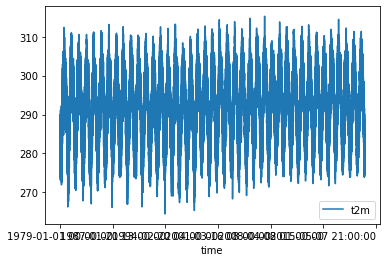

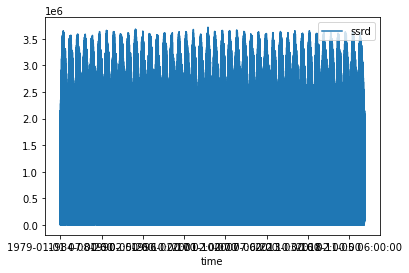

In [190]:
temps.plot()
radiation.plot()

<AxesSubplot:xlabel='time'>

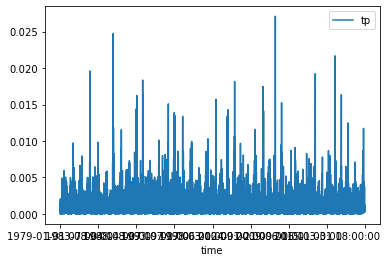